Notebook to explore the possibility of internal wave beams generate at the slopes of the fraser river.

In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import datetime
%matplotlib inline

from nowcast import analyze, research_VENUS
from salishsea_tools import viz_tools

In [2]:
grid = nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc')
bathy = grid.variables['Bathymetry']

In [3]:
day = datetime.datetime(2015,4,3)
datestr=day.strftime('%d%b%y').lower()
datenum = day.strftime('%Y%m%d')

f = nc.Dataset('/results/SalishSea/nowcast/{}/SalishSea_1h_{}_{}_grid_U.nc'.format(datestr, datenum,
                                                                                    datenum))

u =f.variables['vozocrtx'][:]
u=np.ma.masked_values(u,0)

f = nc.Dataset('/results/SalishSea/nowcast/{}/SalishSea_1h_{}_{}_grid_V.nc'.format(datestr, datenum,
                                                                                    datenum))

v =f.variables['vomecrty'][:]
v=np.ma.masked_values(v,0)


In [4]:
mesh= nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/mesh_mask_SalishSea2.nc')

dept = mesh.variables['gdept'][0,:,:,:]

e3u = mesh.variables['e3u'][0,:,:,:]
umask = mesh.variables['umask'][0,:,:,:]

e3v = mesh.variables['e3v'][0,:,:,:]
vmask = mesh.variables['vmask'][0,:,:,:]

depw = mesh.variables['gdepw'][0,:,:,:]
e3w = mesh.variables['e3w'][0,:,:,:]

In [5]:
SITES = research_VENUS.SITES['VENUS']

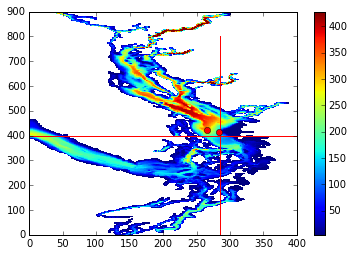

In [6]:
plt.pcolormesh(bathy[:])
j=400
i=285
plt.plot([0,400],[j,j],'r')
plt.plot([i,i],[0,800],'r')
plt.plot([0,400],[j,j],'r')
plt.plot(SITES['Central']['i'],SITES['Central']['j'],'ro')
plt.plot(SITES['East']['i'],SITES['East']['j'],'ro')
plt.colorbar()

Coherhent beams? Do I have to separate barotoproic combeinent somehow? Is this just noise? Maybe look at baroclinic u? What about at a certain freqeuncy?

In [7]:
depav_u= analyze.depth_average_mask(u,e3u,umask,1)
depav_u = np.expand_dims(depav_u,1)
ubc = u-depav_u

In [8]:
depav_v= analyze.depth_average_mask(v,e3v,vmask,1)
depav_v = np.expand_dims(depav_v,1)
vbc = v-depav_v

del depav_u, depav_v, depw, e3w, umask, vmask, e3u, e3v

In [9]:
iss=200; iee=350
jss=200; jee=600;
ubc, vbc = viz_tools.unstagger(ubc[:,:,jss:jee,iss:iee],vbc[:,:,jss:jee,iss:iee])

ke = 0.5*(ubc**2+vbc**2)

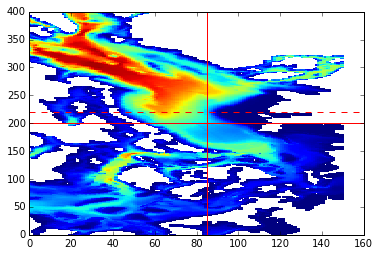

In [10]:
plt.pcolormesh(bathy[jss:jee,iss:iee])
plt.plot([85,85], [0,400],'r')
plt.plot([0,160],[200,200],'r')
plt.plot([0,160],[220,220],'r--')

Horizontal cross section from above (solid)

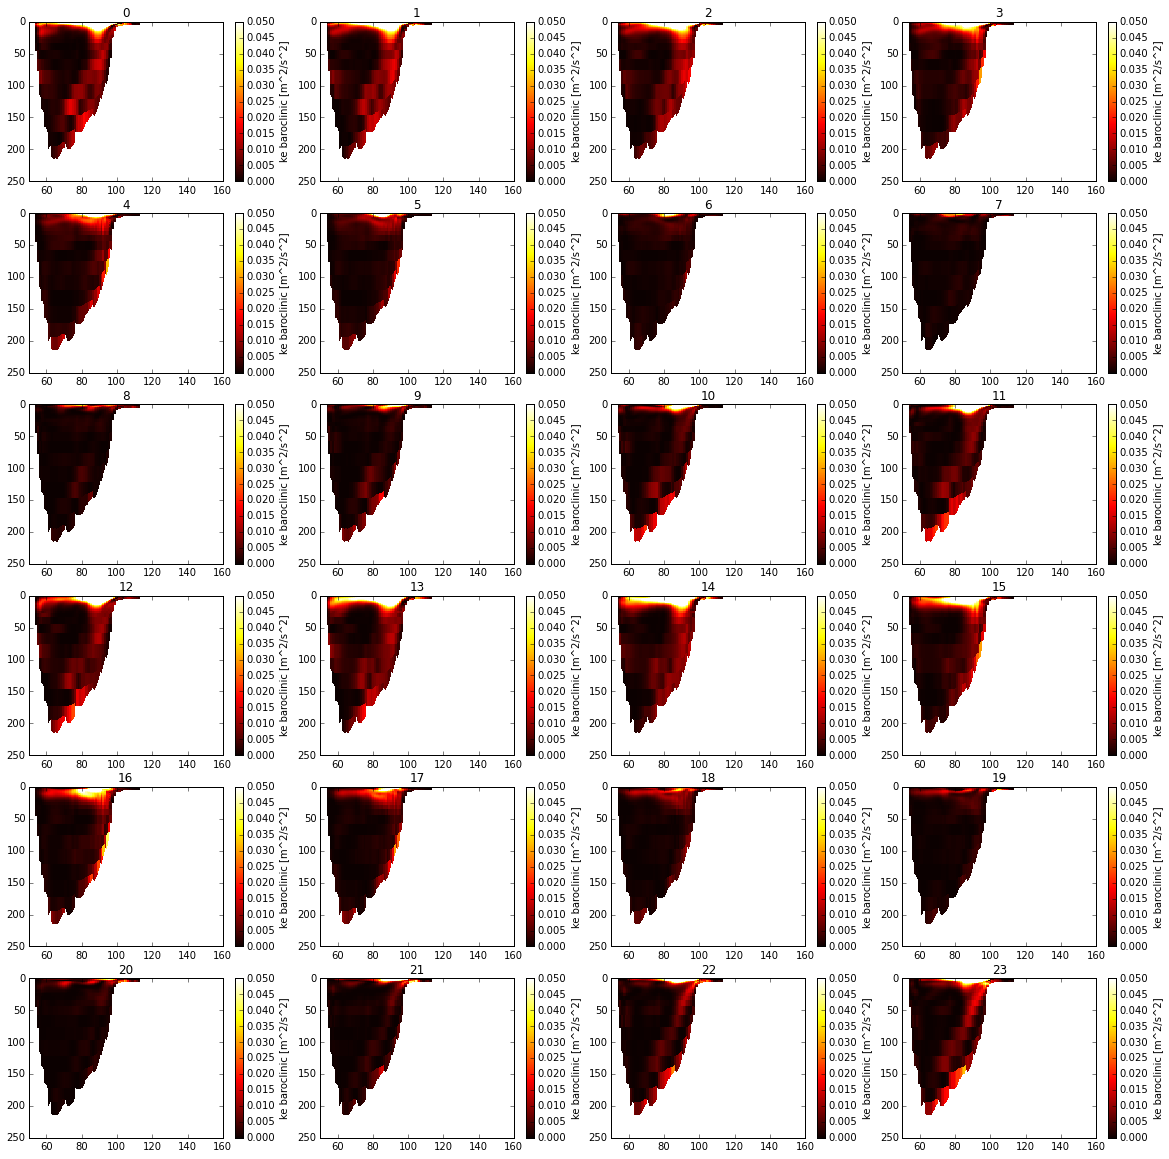

In [11]:
j=200
fig, axs = plt.subplots(6,4, figsize=(20,20))
subdep = dept[:,jss:jee,iss:iee]
subdep = subdep[:,1:,1:]
x, _ = np.meshgrid(np.arange(ke.shape[-1]),dept[:,1,1])
for t,ax in zip(np.arange(ke.shape[0]),axs.flatten()):
    mesh =ax.pcolormesh(x, subdep[:,j,:], ke[t,:,j,:],cmap='hot',vmin=0,vmax=0.05)
    ax.axis([50,160,250,0])
    cbar=plt.colorbar(mesh, ax=ax)
    cbar.set_label('ke baroclinic [m^2/s^2]') 
    ax.set_title(t)

A little bit further north, through Fraser (dotted) 

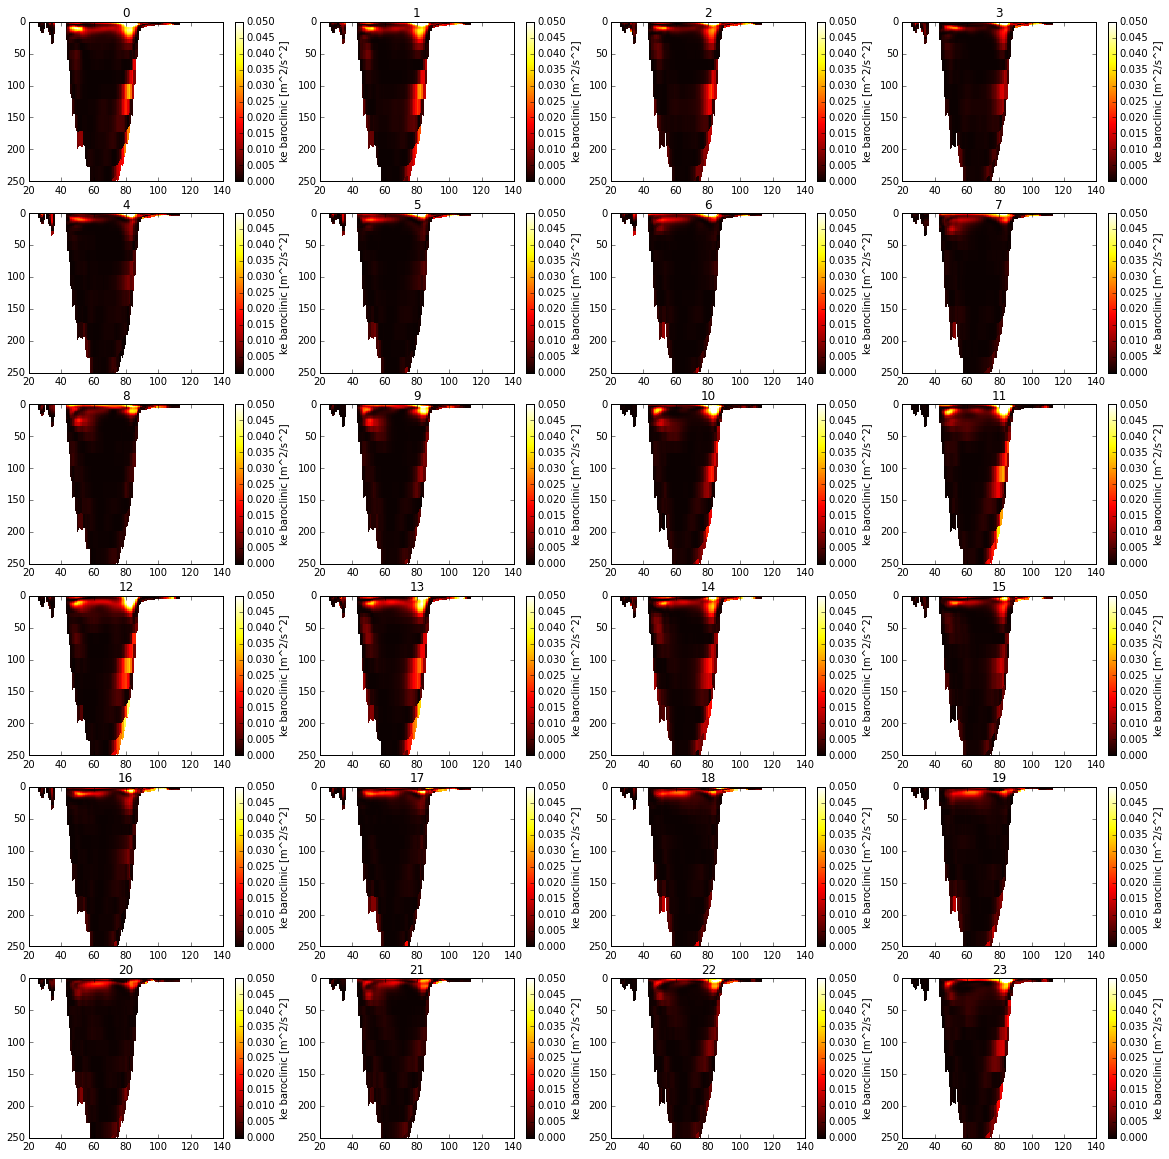

In [12]:
j=220
fig, axs = plt.subplots(6,4, figsize=(20,20))
subdep = dept[:,jss:jee,iss:iee]
subdep = subdep[:,1:,1:]
x, _ = np.meshgrid(np.arange(ke.shape[-1]),dept[:,1,1])
for t,ax in zip(np.arange(ke.shape[0]),axs.flatten()):
    mesh =ax.pcolormesh(x, subdep[:,j,:], ke[t,:,j,:],cmap='hot',vmin=0,vmax=0.05)
    ax.axis([20,140,250,0])
    cbar=plt.colorbar(mesh, ax=ax)
    cbar.set_label('ke baroclinic [m^2/s^2]') 
    ax.set_title(t)

That plob looks like Richs's current, but it also looks like it could be a beam...
Could we pick these up at the East/Central node?

Vertical cross section from above

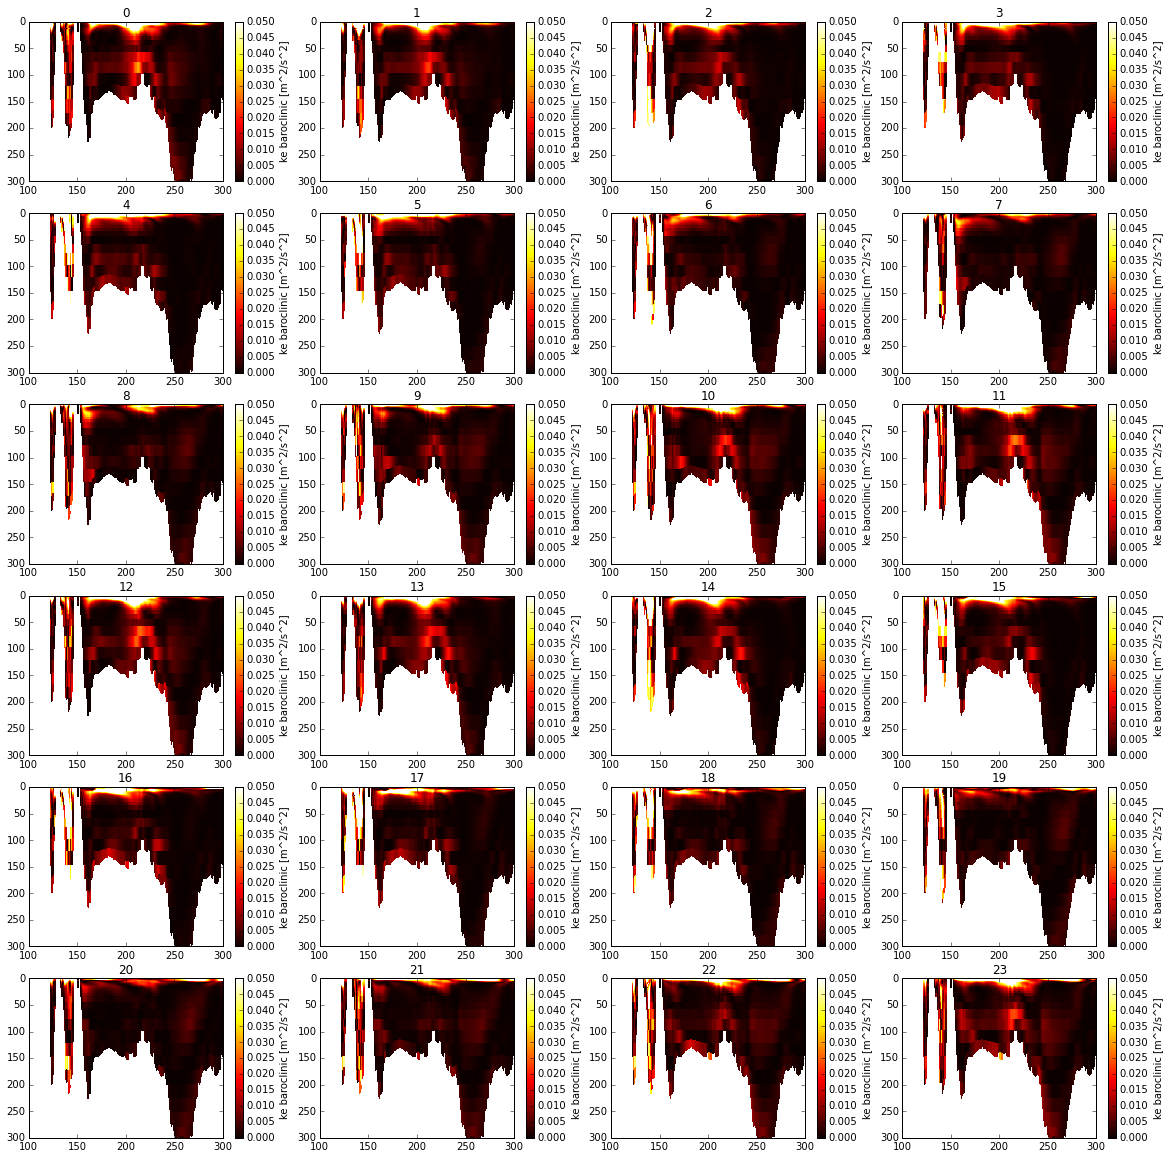

In [13]:
i=85
fig, axs = plt.subplots(6,4, figsize=(20,20))
subdep = dept[:,jss:jee,iss:iee]
subdep = subdep[:,1:,1:]
x, _ = np.meshgrid(np.arange(ke.shape[-2]),dept[:,1,1])
for t,ax in zip(np.arange(ke.shape[0]),axs.flatten()):
    mesh =ax.pcolormesh(x, subdep[:,:,i], ke[t,:,:,i],cmap='hot',vmin=0,vmax=0.05)
    ax.axis([100,300,300,0])
    cbar=plt.colorbar(mesh, ax=ax)
    cbar.set_label('ke baroclinic [m^2/s^2]') 
    ax.set_title(t)

Vertical slice 2

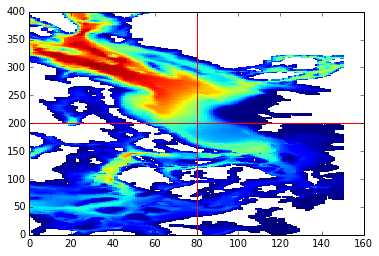

In [14]:
i=80
plt.pcolormesh(bathy[jss:jee,iss:iee])
plt.plot([i,i], [0,400],'r')
plt.plot([0,160],[200,200],'r')

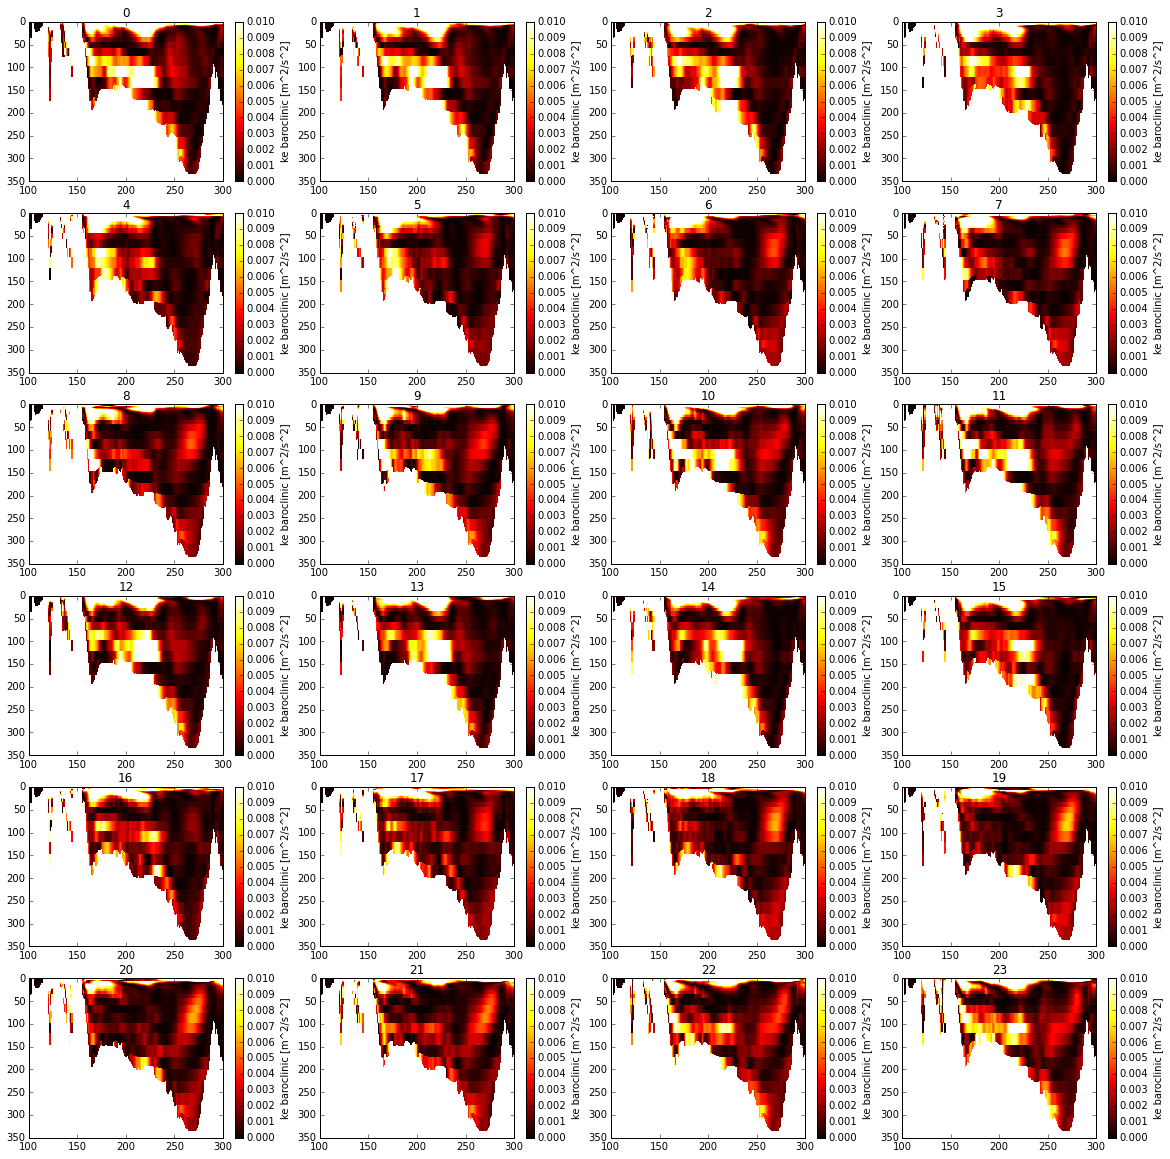

In [15]:

fig, axs = plt.subplots(6,4, figsize=(20,20))
subdep = dept[:,jss:jee,iss:iee]
subdep = subdep[:,1:,1:]
x, _ = np.meshgrid(np.arange(ke.shape[-2]),dept[:,1,1])
for t,ax in zip(np.arange(ke.shape[0]),axs.flatten()):
    mesh =ax.pcolormesh(x, subdep[:,:,i], ke[t,:,:,i],cmap='hot',vmin=0,vmax=0.01)
    ax.axis([100,300,350,0])
    cbar=plt.colorbar(mesh, ax=ax)
    cbar.set_label('ke baroclinic [m^2/s^2]') 
    ax.set_title(t)

This is that beam I saw in tn the harmoinc analysis. Slope fits with what is expected for M2 frequency and N2. I'm not sure where it is generated. Two possibilities:
* sill at y=300, z=100, but the beam seems to read the surface and so this can't be the source, can it? Is there flow going across that sill? 
* Generated somewhere else (sill at y=175, z=150m) and reflecting from bottom towards surface..

The sill at about y=175, z=150m I think would be the spot where Rich's boundary current comes in. 

Diaganoal slice

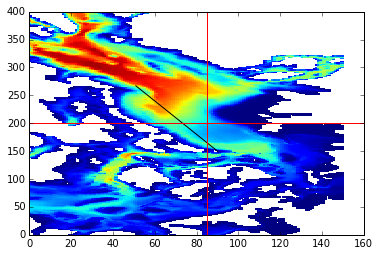

In [16]:
plt.pcolormesh(bathy[jss:jee,iss:iee])
ivec = np.arange(90,50,-1)
jvec = np.arange(150,270,3)
plt.plot(ivec, jvec,'k')
plt.plot([85,85], [0,400],'r')
plt.plot([0,160],[200,200],'r')

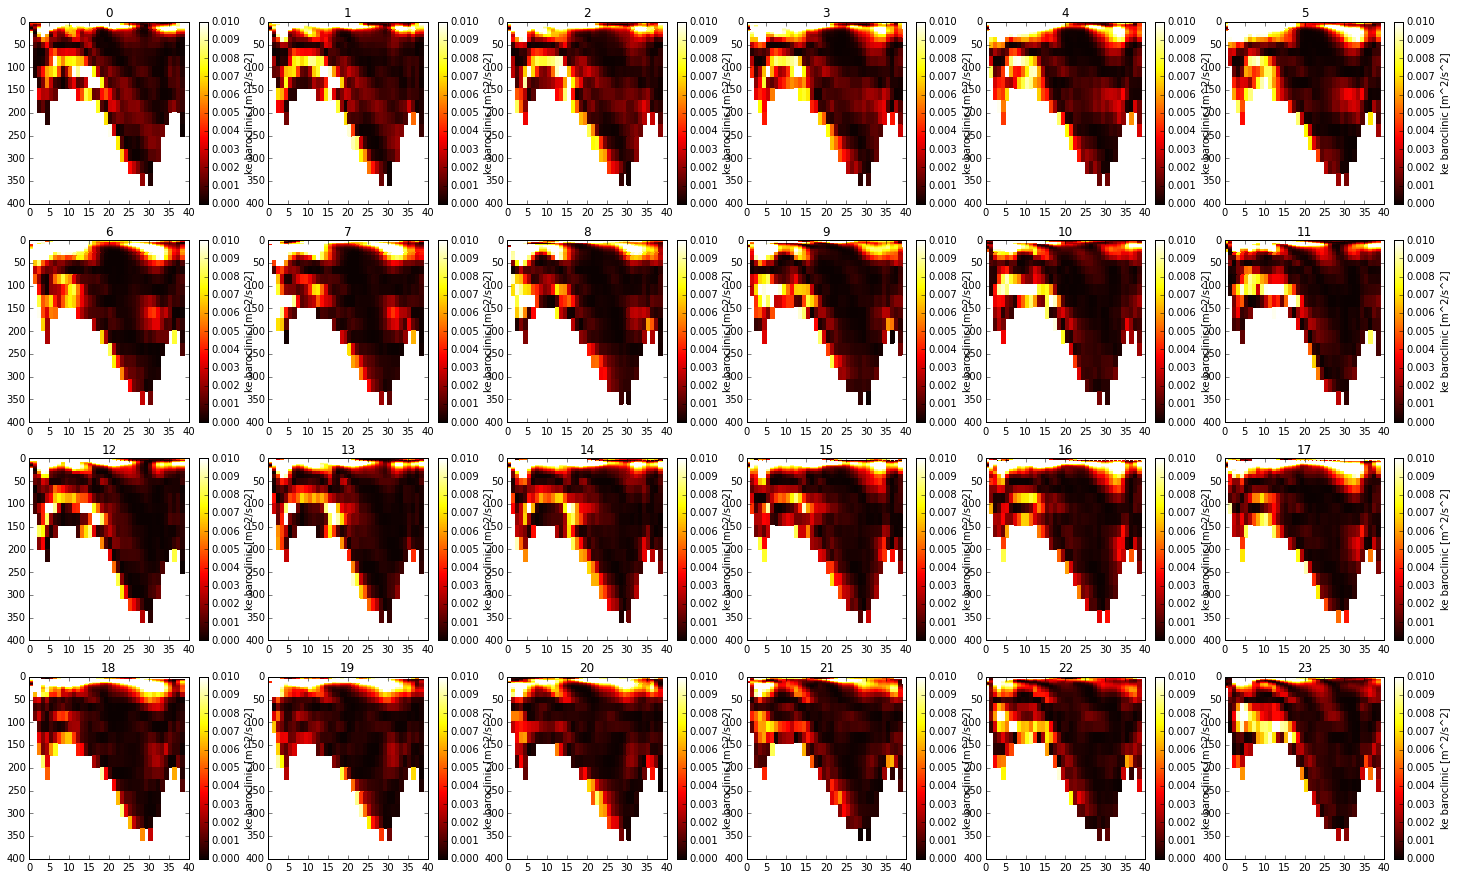

In [17]:

fig, axs = plt.subplots(4,6, figsize=(25,15))
x,_ = np.meshgrid(np.arange(ke[t,:,jvec, ivec].shape[0]), dept[:,1,1])
for t,ax in zip(np.arange(ke.shape[0]),axs.flatten()):
    mesh =ax.pcolormesh(x, dept[:, jvec, ivec], ke[t,:,jvec, ivec].T,cmap='hot',vmin=0,vmax=0.01)
    cbar=plt.colorbar(mesh, ax=ax)
    ax.axis([0,40,400,0])
    cbar.set_label('ke baroclinic [m^2/s^2]') 
    ax.set_title(t)

I think I need energy fluxes to see the direction.

Another diagnoal slice.

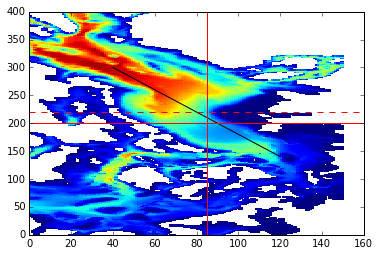

In [18]:
plt.pcolormesh(bathy[jss:jee,iss:iee])
ivec = np.arange(120,39,-1)
jvec = np.arange(140,302,2)
plt.plot(ivec, jvec,'k')
plt.plot([85,85], [0,400],'r')
plt.plot([0,160],[200,200],'r')
plt.plot([0,160],[220,220],'r--')

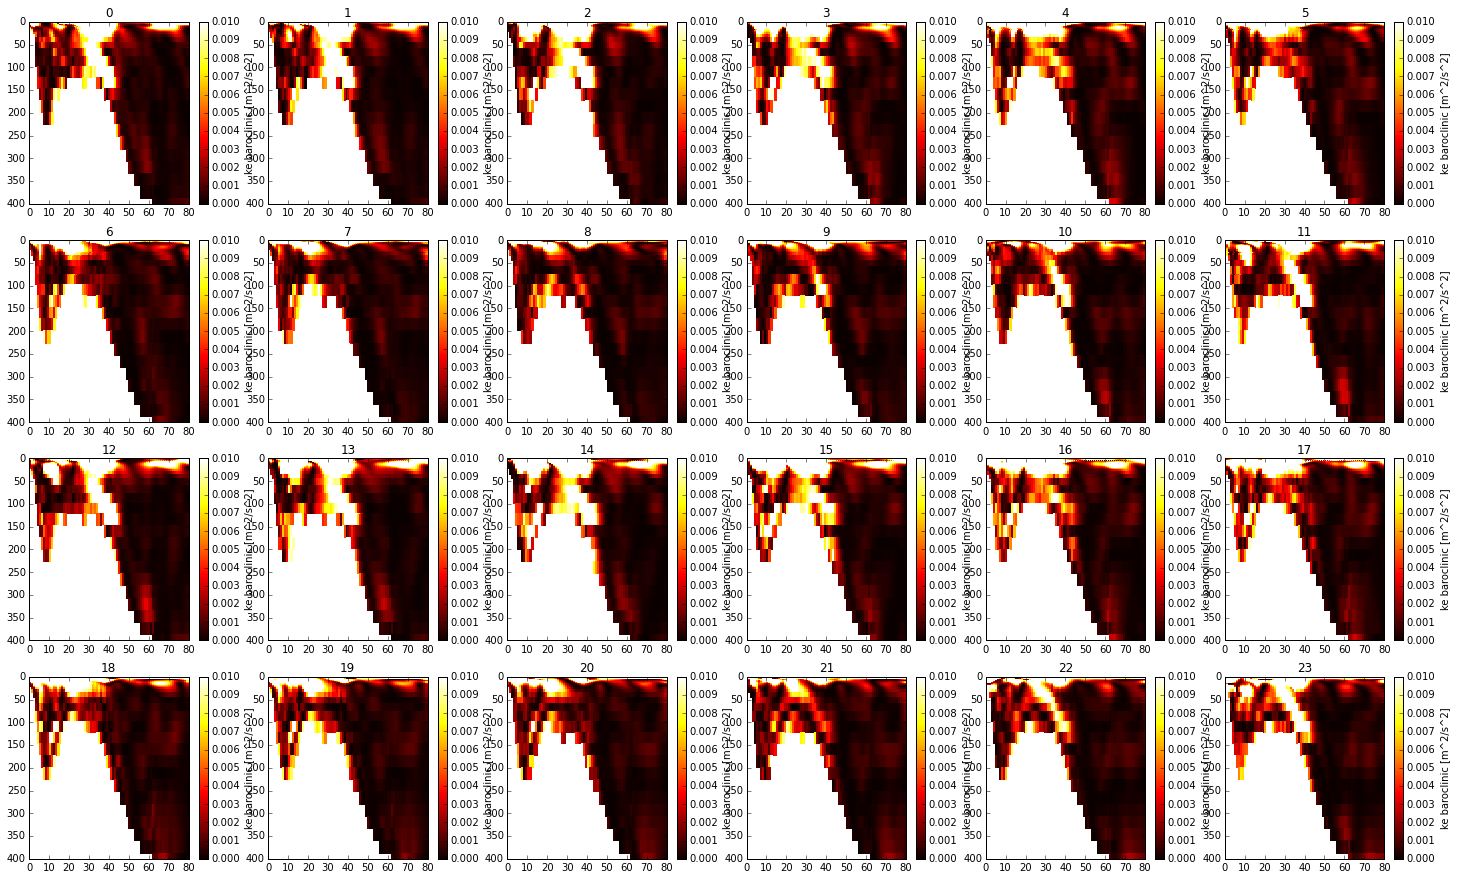

In [19]:
fig, axs = plt.subplots(4,6, figsize=(25,15))
x,_ = np.meshgrid(np.arange(ke[t,:,jvec, ivec].shape[0]), dept[:,1,1])
for t,ax in zip(np.arange(ke.shape[0]),axs.flatten()):
    mesh =ax.pcolormesh(x, dept[:, jvec, ivec], ke[t,:,jvec, ivec].T,cmap='hot',vmin=0,vmax=0.01)
    cbar=plt.colorbar(mesh, ax=ax)
    ax.axis([0,80,400,0])
    cbar.set_label('ke baroclinic [m^2/s^2]') 
    ax.set_title(t)